<a href="https://colab.research.google.com/github/akanksha4116/MLModel/blob/main/Energy%20consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Revision History

Update with your details here

Name  Akanksha

Date  10 April 2021

## Basic problem statement 
Explore, understand and build on what factors influence energy consumption – for appliance and light

## Data Set Information

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column.

## Attribute Information
* date : time year-month-day hour:minute:second
* Appliances, energy use in Wh 
* lights, energy use of light fixtures in the house in Wh 
* T1, Temperature in kitchen area, in Celsius 
* RH_1, Humidity in kitchen area, in % 
* T2, Temperature in living room area, in Celsius 
* RH_2, Humidity in living room area, in % 
* T3, Temperature in laundry room area 
* RH_3, Humidity in laundry room area, in % 
* T4, Temperature in office room, in Celsius 
* RH_4, Humidity in office room, in % 
* T5, Temperature in bathroom, in Celsius 
* RH_5, Humidity in bathroom, in % 
* T6, Temperature outside the building (north side), in Celsius 
* RH_6, Humidity outside the building (north side), in % 
* T7, Temperature in ironing room , in Celsius 
* RH_7, Humidity in ironing room, in % 
* T8, Temperature in teenager room 2, in Celsius 
* RH_8, Humidity in teenager room 2, in % 
* T9, Temperature in parents room, in Celsius 
* RH_9, Humidity in parents room, in % 
* To, Temperature outside (from Chievres weather station), in Celsius 
* Pressure (from Chievres weather station), in mm Hg 
* RH_out, Humidity outside (from Chievres weather station), in % 
* Wind speed (from Chievres weather station), in m/s 
* Visibility (from Chievres weather station), in km 
* Tdewpoint (from Chievres weather station), in Deg C

## Read data and basic data clean-up

In [ ]:
#importing libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data=pd.read_csv('/content/energydata_complete.csv')

In [ ]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

##Perform analysis

In [ ]:
#data['exact_date']=data['date'].str.split(' ').str[0]
#data['WEEKDAY'] = ((pd.to_datetime(data['date']).dt.dayofweek)// 5 == 1).astype(int)
data["hours"]=(data['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)

In [ ]:
#Has extracted the day feature from date hence droping it
data.drop('date',axis=1,inplace=True)

In [ ]:
#Target variable for Regression Problem
target=['Appliances','lights']
data['target']=data['Appliances']+data['lights']

In [ ]:
data.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'hours', 'target'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

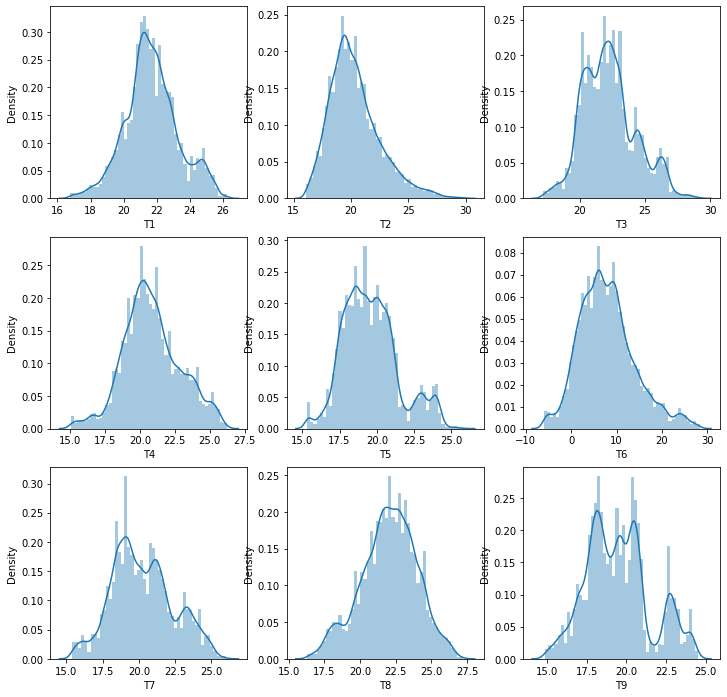

In [ ]:
# distribution Plot For Temperature values
f,axis=plt.subplots(3,3,figsize=(12,12))
sns.distplot(data['T1'],ax=axis[0][0])
sns.distplot(data['T2'],ax=axis[0][1])
sns.distplot(data['T3'],ax=axis[0][2])
sns.distplot(data['T4'],ax=axis[1][0])
sns.distplot(data['T5'],ax=axis[1][1])
sns.distplot(data['T6'],ax=axis[1][2])
sns.distplot(data['T7'],ax=axis[2][0])
sns.distplot(data['T8'],ax=axis[2][1])
sns.distplot(data['T9'],ax=axis[2][2])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

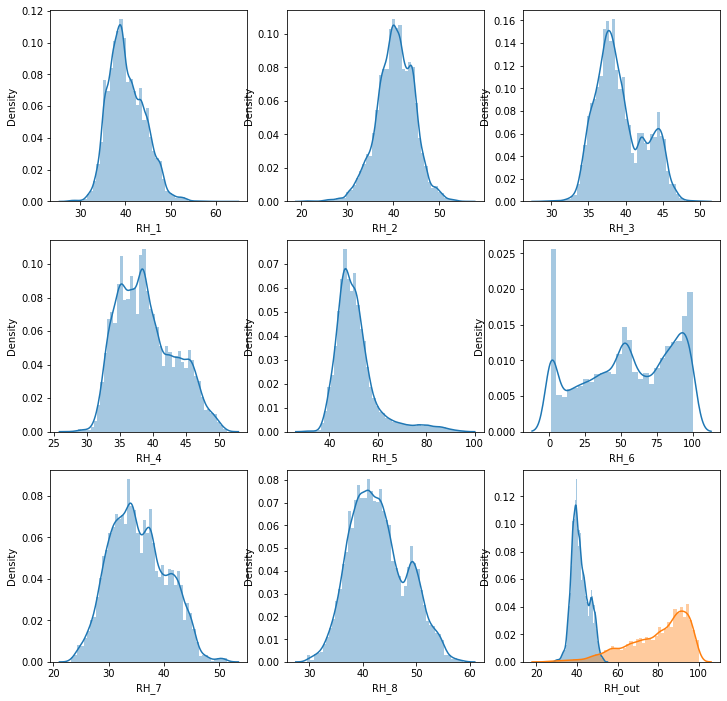

In [ ]:
# Distribution plot for Humidity values
f,axis=plt.subplots(3,3,figsize=(12,12))
sns.distplot(data['RH_1'],ax=axis[0][0])
sns.distplot(data['RH_2'],ax=axis[0][1])
sns.distplot(data['RH_3'],ax=axis[0][2])
sns.distplot(data['RH_4'],ax=axis[1][0])
sns.distplot(data['RH_5'],ax=axis[1][1])
sns.distplot(data['RH_6'],ax=axis[1][2])
sns.distplot(data['RH_7'],ax=axis[2][0])
sns.distplot(data['RH_8'],ax=axis[2][1])
sns.distplot(data['RH_9'],ax=axis[2][2])
sns.distplot(data['RH_out'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


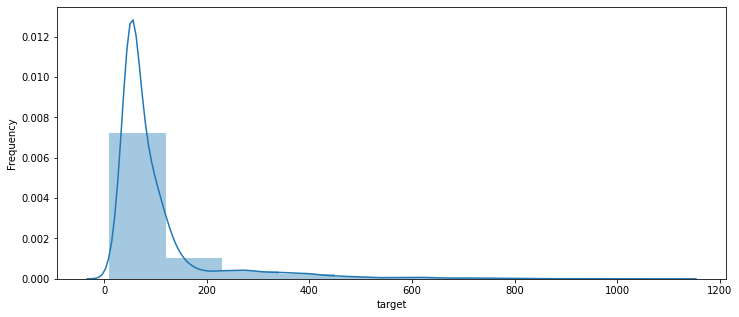

In [ ]:
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(data['target'] , bins=10 ) ;

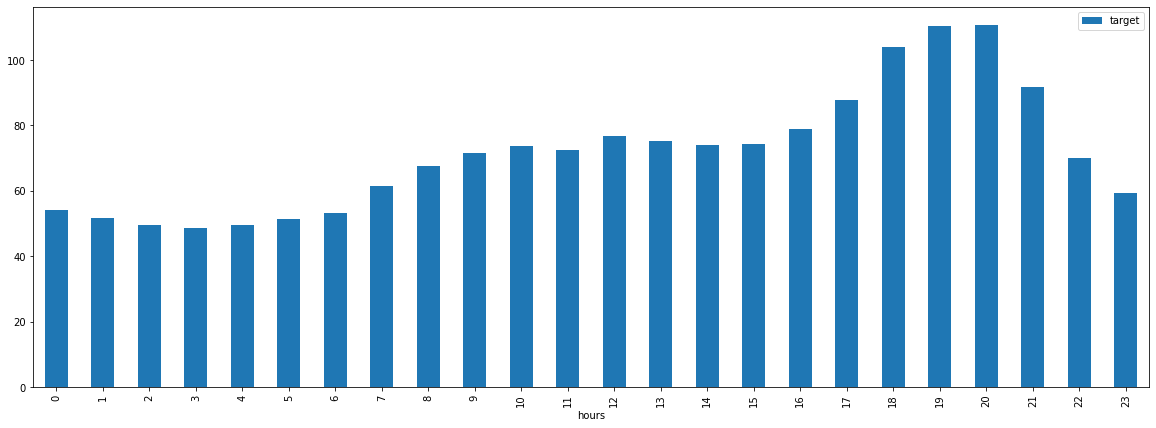

In [ ]:
table = pd.pivot_table(data=data,index=['hours'], values='target')
table.plot(kind="bar",figsize=(20, 7))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


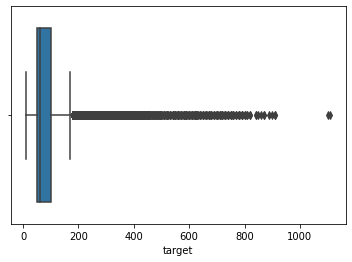

In [ ]:
sns.boxplot(data['target'])

In [ ]:
# target variable contains outliers so removing them
Y=data[['target']]
Q1=Y.quantile(0.25)
Q3=Y.quantile(0.75)
print(Q1,Q3)

target    50.0
Name: 0.25, dtype: float64 target    100.0
Name: 0.75, dtype: float64


In [ ]:
IQR=Q3-Q1
outlierDf= ( ((data[['target']] < (Q1 - 1.5 * IQR)) |(data[['target']]> (Q3 + 1.5 * IQR))) )

In [ ]:
data['outlierDf']=outlierDf


In [ ]:
data=data[data['outlierDf']==False]

In [ ]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hours,target
count,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000,17525.000000
mean,66.821683,3.343795,21.687686,40.133988,20.288242,40.470238,22.227617,39.153637,20.859020,38.976155,19.611251,50.973532,7.745446,54.889432,20.282057,35.433395,22.050931,43.023597,19.507019,41.553041,7.302803,755.573401,80.284246,3.966562,38.303894,3.758313,25.010122,25.010122,11.180599,70.165478
std,27.881495,7.409400,1.603430,3.929236,2.170000,4.065542,1.966557,3.218868,2.047602,4.322376,1.837106,8.991122,6.031090,30.688278,2.100272,5.078855,1.962375,5.200344,2.009857,4.164599,5.291112,7.337498,14.765990,2.448512,11.964971,4.189562,14.519096,14.519096,7.135127,30.699187
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.290000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.366667,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000,10.000000
25%,50.000000,0.000000,20.760000,37.230000,18.790000,37.930000,20.790000,36.821429,19.566667,35.500000,18.290000,45.400000,3.463333,31.223333,18.705000,31.553333,20.850000,39.200000,18.066667,38.530000,3.500000,751.000000,71.333333,2.000000,29.000000,0.933333,12.464531,12.464531,5.000000,50.000000
50%,60.000000,0.000000,21.600000,39.530000,19.926667,40.545000,22.100000,38.466667,20.666667,38.333333,19.390000,49.090000,7.156667,55.266667,20.100000,34.900000,22.166667,42.456667,19.390000,40.863333,6.850000,756.100000,84.500000,3.500000,40.000000,3.433333,24.949665,24.949665,11.000000,60.000000
75%,80.000000,0.000000,22.600000,42.826667,21.463333,43.326667,23.290000,41.500000,22.100000,42.060000,20.600000,53.817455,11.063333,82.933889,21.600000,39.045000,23.390000,46.590000,20.600000,44.290000,10.333333,760.966667,92.000000,5.333333,40.000000,6.533333,37.660192,37.660192,17.000000,90.000000
max,170.000000,50.000000,26.200000,59.633333,29.856667,56.026667,29.100000,49.656667,26.200000,51.000000,25.795000,96.321667,28.290000,99.900000,25.890000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.266667,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,23.000000,170.000000


In [ ]:
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hours,target,outlierDf
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17,90,False
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17,90,False
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17,80,False
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17,90,False
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17,100,False


In [ ]:
data.drop(['Appliances','lights','outlierDf'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0.5, 1.0, 'Correlation matrix of numerical variables')

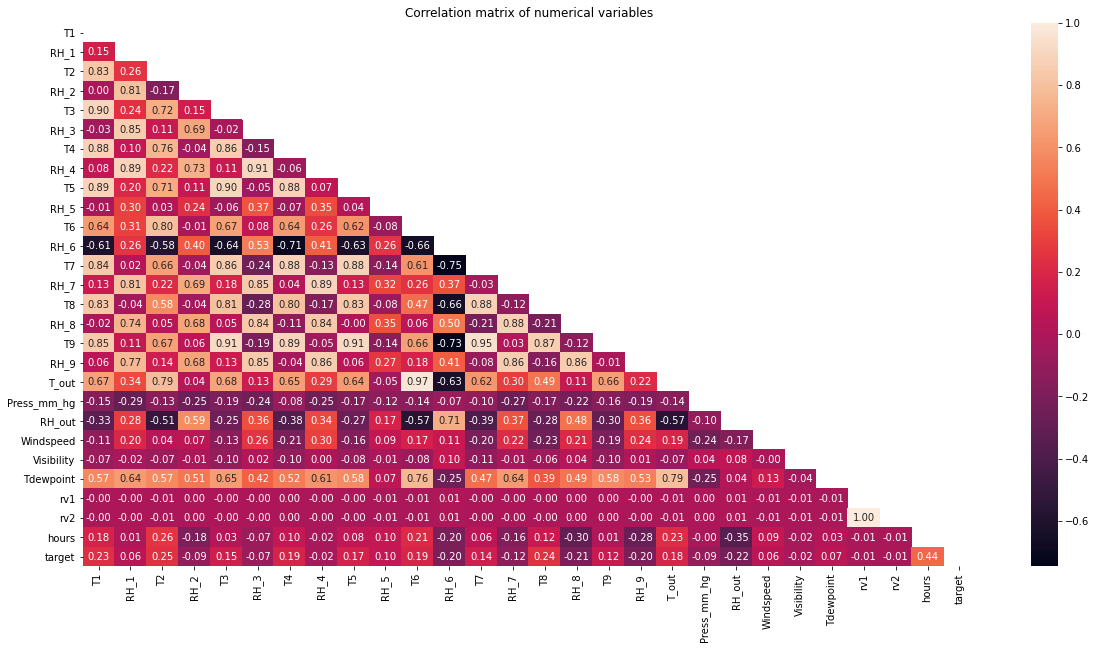

In [ ]:
# correlation matrix
corr = data.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(corr,annot=True,fmt=".2f",mask=mask)
plt.title(title)


In [ ]:
#getting features having higher corelation

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 40))


Top Absolute Correlations
rv1    rv2          1.000000
T6     T_out        0.974029
T7     T9           0.946446
T5     T9           0.913895
T3     T9           0.912978
RH_3   RH_4         0.910321
T3     T5           0.900028
T1     T3           0.897104
T4     T9           0.892483
RH_4   RH_7         0.891804
RH_1   RH_4         0.890154
T1     T5           0.887328
T7     T8           0.883409
T4     T7           0.882188
T1     T4           0.881301
T4     T5           0.877475
T5     T7           0.877435
RH_7   RH_8         0.876695
T8     T9           0.869386
T3     T4           0.862711
RH_7   RH_9         0.858810
RH_8   RH_9         0.856247
T3     T7           0.855920
RH_4   RH_9         0.855348
RH_1   RH_3         0.854824
T1     T9           0.848520
RH_3   RH_7         0.845967
       RH_9         0.845883
RH_4   RH_8         0.842506
T1     T7           0.842058
RH_3   RH_8         0.841106
T1     T8           0.832737
T5     T8           0.832255
T1     T2        

In [ ]:
data.drop(['T6','T9','rv1'] , axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##  model development 

In [ ]:
#Independent and target variable
Y=data['target']
X=data.drop('target',axis=1)

In [ ]:
sc=StandardScaler()
X=sc.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=42)

In [ ]:
#RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=800 ,max_features= 'sqrt',bootstrap=[True, False])
regressor.fit(X_train, Y_train)
y_pred_train = regressor.predict(X_train)

In [ ]:
pred=regressor.predict(X_test)
r2_score(Y_test,pred)

0.7492284999208256

In [ ]:
#GradientBoostingRegressor
regressor_gb = GradientBoostingRegressor(n_estimators=900, max_features='sqrt', random_state=40)
regressor_gb.fit(X_train, Y_train)
pred=regressor_gb.predict(X_test)
r2_score(Y_test,pred)

0.6561977295937635

In [ ]:
# XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train, Y_train)
pred=regressor_xgb.predict(X_test)
r2_score(Y_test,pred)

[05:06:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.5368805686342136

In [ ]:
# LGBMRegressor
regressor_lgbm = LGBMRegressor()
regressor_lgbm.fit(X_train, Y_train)
pred=regressor_lgbm.predict(X_test)
r2_score(Y_test,pred)

0.6780477658700439

## Observations and motivation for next steps



*   Random Forest provides highest R2 value
*   Target value contains outliers performed well after removing them
*   As next step we can hypertune parameters for RandomForest and find best_estimators
*   T6,T9 Rv1 shows strong  correlation with other features
*  Model gives max importance to hour feature.



In [ ]:
importance = regressor.feature_importances_
feats={}
for feature, importance in zip(data.columns, regressor.feature_importances_):
    feats[feature] = importance
importance =pd.DataFrame.from_dict(feats, orient='index').sort_values(by=0,ascending=False)
importance

,0
hours,0.181344
T2,0.056916
T8,0.050138
RH_8,0.048345
RH_9,0.046614
RH_5,0.040775
Press_mm_hg,0.040203
RH_1,0.039926
T4,0.038852
T1,0.037927


## Model performance on test data

from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [200,250,300],
              'n_estimators' : [500,600,800],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = RandomForestRegressor(random_state=40)

grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)

In [ ]:
# Performance
pred=regressor.predict(X_test)
r2_score(Y_test,pred)


0.7492284999208256

## Build a business case for next steps 

As Now we have data on energy consumption  for appliances and lights  based on differnt factors , 
We can go one step further and check the usage for diffent kind of appliances in particular environment.

## References (add your references below)
[1] Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788,